# Programming for Data Analysis Project: Simulating a Dataset

I found this project very hard to get a phenomenon that I was happy with.  My initial thought was to do a dataset with Economic Indicators but when I thought about it, something like currency or share prices are not random.  There is a  movement to them rather than just purely a random set of numbers.

Then I thought of doing a dataset on the length of the morning school trip with the variables of weather, time of year, day of the week, setting out time and how many cars were coming before we got out onto the main road.  But I thought that was too subjective and simplistic.

I then turned my attention to the fact that there is no longer a job for life and how long people stay in their jobs and what factors cause them to movce jobs.  After getting no replies form the many online Irish jobs sites for information on their job surveys I shelved this idea.

My attention then went back to the cso.ie website and I found a travel survey.  I had decided to look at a travel dataset. I wanted to look at how people travel, how long they travel for, distance covered and the reason for the travel all of these for inside and outside of dublin.  

But because there were only 3 variables even though they would be doubled I decided to reexamine my initial thougths of doing a dataset from my degree in Economics and Finance and look at some Economic indicators namely GDP, employment growth, Interest rates and currency exchange rate with the British Pound Sterling.

I eventually found a couple of ways to simulate share prices.  One is called Geometric Brownian Motion and the other is using cumulative sumation in time series.  Geometric Brownian Motion is very interesting and is used to simulate Share prices in the real world (it has its limitations in share price simulation) and I will adapt them to simulate the currency exchange rate of the euro and the British Pound Sterling.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
prng = pd.period_range('01/2010', '09/2018', freq='M')



In [3]:
data = np.array(['a','b','c','d'])
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
dtype: object


In [5]:
data = np.array(['a','b','c','d'])
s = pd.Series(data,index=[100,101,102,103])
print(s)

100    a
101    b
102    c
103    d
dtype: object


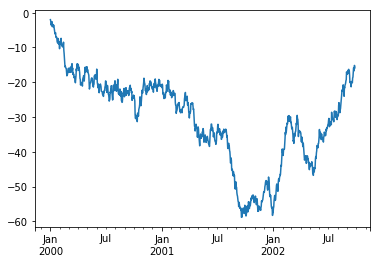

In [6]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()


In [11]:
np.random.randint(-14.00, high=8.00, size=100, dtype='i')


array([-11, -10,  -6, -13, -13,   1,  -2, -13, -11, -12,   2,  -4, -13,
         7,   7, -13,   3,  -9, -13, -10,  -9,   5, -13,   1,  -9,   0,
         1,  -5, -12,  -7,  -7,  -1,  -3, -10, -11, -14, -10,   2,   6,
         1,  -1, -13,   1,   7, -10, -14,   6, -11,   4,   2,   5, -10,
         2, -13,  -8,  -1, -12, -10,   2, -14,  -3,   7, -13,  -7, -14,
        -8, -12,   1, -12,  -5,  -8, -13,  -2,   7,  -2,  -5,   6, -14,
        -6,   0,   2,   6, -14,   6,  -9, -13,  -7,  -8,  -5,  -1,  -9,
         7,  -9,   1,   5,   7, -14, -11, -10, -12])

In [30]:
import numpy as np
np.random.seed(123)
GDPchange = np.random.uniform(low=-13.8, high=14, size=(100,))
GDPchange

array([  5.56184336,  -5.84532649,  -7.49352959,   1.52655058,
         6.20123736,  -2.03764041,  13.46524472,   5.23826673,
        -0.43009314,  -2.89913299,  -4.25965115,   6.46758187,
        -1.6076916 , -12.14095447,  -2.7343697 ,   6.71627228,
        -8.72672989,  -8.92244118,   0.97712819,   0.98480692,
         3.83634665,   9.81420388,   6.33985803,   3.1864536 ,
         6.28392604,  -4.82174219,  -3.74227537,  -7.45428218,
        -5.63474951,   3.74113624, -11.23948267,  -1.7431074 ,
        -1.82201518,  -0.07555429,  -1.96191793,  -5.119138  ,
        -1.94743367,  11.03621873,  12.44764851,   0.15105959,
         3.54589206, -10.58580862,  -4.97946361,  -2.26783131,
        10.28339459,  -6.83734084,  -0.37164745,  13.59856204,
         0.64168632,   3.23846782, -10.44652309,   9.17227425,
         2.96507157,   1.35289058,  -4.27116542,  -5.34544207,
        -2.20678253,   5.14016129,  10.5377002 ,   0.38974098,
         4.80692317,   2.48903616,   3.57231736,   4.95

In [29]:
np.around(GDPchange, decimals=2, out=None)

array([  1.31,  -7.59,  -8.88,  -1.84,   1.81,  -4.62,   7.48,   1.06,
        -3.36,  -5.29,  -6.35,   2.02,  -4.28, -12.5 ,  -5.16,   2.21,
        -9.84,  -9.99,  -2.27,  -2.26,  -0.03,   4.63,   1.92,  -0.54,
         1.88,  -6.79,  -5.95,  -8.85,  -7.43,  -0.11, -11.8 ,  -4.39,
        -4.45,  -3.09,  -4.56,  -7.02,  -4.55,   5.59,   6.69,  -2.91,
        -0.26, -11.29,  -6.91,  -4.8 ,   5.  ,  -8.37,  -3.32,   7.59,
        -2.53,  -0.5 , -11.18,   4.13,  -0.71,  -1.97,  -6.36,  -7.2 ,
        -4.75,   0.98,   5.2 ,  -2.72,   0.72,  -1.09,  -0.24,   0.84,
         4.48, -11.99,   2.77,  -8.51,  -9.59,  -1.38, -11.72,   5.41,
        -0.19,   1.9 , -13.45,  -0.9 ,  -1.72, -10.35, -10.48,   1.29,
        -6.88,   1.22,  -1.77,  -5.36,   6.28,   4.46,  -6.04, -12.85,
        -7.19,  -5.16,   1.5 ,   7.8 ,  -6.08,   2.75,  -0.93,   1.21,
       -10.52,  -5.14,  -8.57,  -6.35])

https://en.wikipedia.org/wiki/Brownian_motion

https://en.wikipedia.org/wiki/Geometric_Brownian_motion

https://www.scipy-lectures.org/intro/numpy/auto_examples/plot_randomwalk.html#sphx-glr-download-intro-numpy-auto-examples-plot-randomwalk-py

https://stackoverflow.com/questions/16734621/random-walk-pandas

http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=FIM02&PLanguage=0

https://ec.europa.eu/eurostat/statistics-explained/index.php/Employment_statistics

https://www.cso.ie/en/releasesandpublications/er/gfsq/governmentfinancestatisticsquarter12018/